In [4]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline  

In [48]:
euler = np.loadtxt("./perihelion_Euler.txt")
Rk4 = np.loadtxt("./perihelion_RK4.txt")
Rk2 = np.loadtxt("./perihelion_midpoint.txt")

leap = np.loadtxt("./perihelion_leapfrog.txt")

In [9]:
np.shape(leap)

(2, 15)

In [13]:
# leap[0,:]

array([  5.00000000e-02,   2.50000000e-02,   1.25000000e-02,
         6.25000000e-03,   3.12500000e-03,   1.56250000e-03,
         7.81250000e-04,   3.90625000e-04,   1.95312500e-04,
         9.76562500e-05,   4.88281300e-05,   2.44140600e-05,
         1.22070300e-05,   6.10351600e-06,   3.05175800e-06])

In [49]:
from scipy.optimize import curve_fit
num=8
x_fit_leap=np.log10(leap[0,:num])
y_fit_leap=np.log10(np.abs(leap[1,:num]))
# Euler
x_fit_eul=np.log10(euler[0,:num])
y_fit_eul=np.log10(np.abs(euler[1,:num]))

x_fit_midpoint=np.log10(Rk2[0,:num])
y_fit_midpoint=np.log10(np.abs(Rk2[1,:num]))

x_fit_rk=np.log10(Rk4[0,:num])
y_fit_rk=np.log10(np.abs(Rk4[1,:num]))

def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

A_RK4,B_RK4 = curve_fit(f, x_fit_rk, y_fit_rk)[0] # your data x, y to fit
A_euler,B_euler = curve_fit(f, x_fit_eul, y_fit_eul)[0] # your data x, y to fit
A_leap,B_leap = curve_fit(f,x_fit_leap, y_fit_leap)[0] # your data x, y to fit
A_mid,B_mid = curve_fit(f,x_fit_midpoint, y_fit_midpoint)[0] # your data x, y to fit


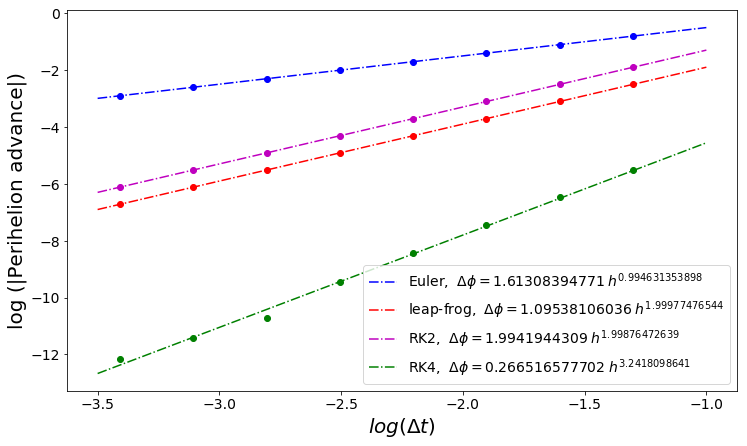

In [54]:
fig= plt.figure(figsize=(12,7))
x = np.linspace(-3.5,-1,50)
# for l in range(3):
#     l=1
    # compute local minima 
    # excluding range boundaries
plt.plot( np.log10(euler[0,:num]), np.log10(np.abs((euler[1,:num]))), 'bo' )
plt.plot( np.log10(leap[0,:num]), np.log10(np.abs((leap[1,:num]))), 'ro' )
plt.plot( np.log10(Rk2[0,:num]), np.log10(np.abs((Rk2[1,:num]))), 'mo' )
plt.plot( np.log10(Rk4[0,:num]), np.log10(np.abs((Rk4[1,:num]))), 'go' )

#     plt.plot(x,-1.92+2 * (x),"b-")
    
#     plt.plot(x_new, ffit)
#     plt.plot(x,(x),"b-")

#     plt.plot(new_x[l],fit_func[l](new_x[l]),"k-",label="fit-function")
plt.xlabel("$log(\Delta t)$",fontsize=20)
plt.ylabel("log (|Perihelion advance|)",fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
#     plt.yscale('symlog')
#     plt.xscale('log')
#     plt.yticks(np.arange(0.999, 1, step=1.e-3))
plt.plot(x,B_euler+ A_euler * (x),"b-.",label="Euler, $ \; \Delta \phi="+str(np.exp(B_euler))+" \; h^{"+str(A_euler)+"}$")
plt.plot(x,B_leap+ A_leap * (x),"r-.",label="leap-frog, $ \; \Delta \phi="+str(np.exp(B_leap))+" \; h^{"+str(A_leap)+"}$")
plt.plot(x,B_mid+ A_mid * (x),"m-.",label="RK2, $ \; \Delta \phi="+str(np.exp(B_mid))+" \; h^{"+str(A_mid)+"}$")

plt.plot(x,B_RK4+ A_RK4 * (x),"g-.",label="RK4, $ \; \Delta \phi="+str(np.exp(B_RK4))+" \; h^{"+str(A_RK4)+"}$")

plt.legend(fontsize=14)
# plt.title("Runge-Kutta 4th order fixed time-step",fontsize=18)
plt.show()

In [27]:
A_leap,B_leap

(2.0547705443628423, 0.22418997770268212)